## Homework 1
*Monika Michaluk*

In this assignment, I focused on developing predictive models for wine quality classification. To begin, I conducted an exploratory data analysis to gain insights into the dataset. The dataset consists of 11 features representing various chemical properties of wines, with the 'quality' rating ranging from 3 to 9.
I examined the distribution and correlations of the variables and checked for any missing data. Although there were few outliers, I decided to retain the data in its original form, I only removed the 'total sulfur dioxide' column due to its high correlation with 'free sulfur dioxide.' Additionally, I normalized the data to ensure consistent scaling across features.

The data was then split into training and testing sets following an 80/20 rule. Next, I trained three classification models: RandomForestClassifier, AdaBoostClassifier, and LogisticRegression. To classify the wines, I defined a threshold on the 'quality' variable, categorizing wines with a quality greater than 5 as 'good' and those with a quality of 5 or lower as 'bad.'

Upon evaluating the models, the RandomForestClassifier turned out to be the best performing model. Below, you can find a comparison of model accuracies, precision (how often they correctly predicted "good" wines), and recall (how often they correctly identified all "good" wines).

In [93]:
for i in range(len(models)):
    print(f'{models[i]}:')
    print(f'Accuracy score: {metrics.accuracy_score(y_test, models_pred_test[i])}')
    print(f'Precision score: {metrics.precision_score(y_test, models_pred_test[i])}')
    print(f'Recall score: {metrics.recall_score(y_test, models_pred_test[i])}')
    print()

LogisticRegression():
Accuracy score: 0.7397959183673469
Precision score: 0.7679045092838196
Recall score: 0.8786039453717754

RandomForestClassifier(n_estimators=20):
Accuracy score: 0.8295918367346938
Precision score: 0.8649851632047477
Recall score: 0.8846737481031867

AdaBoostClassifier():
Accuracy score: 0.7653061224489796
Precision score: 0.8059914407988588
Recall score: 0.8573596358118362



We can also investigate feature importantces predicted by the random forest model, to see if the model is sensible

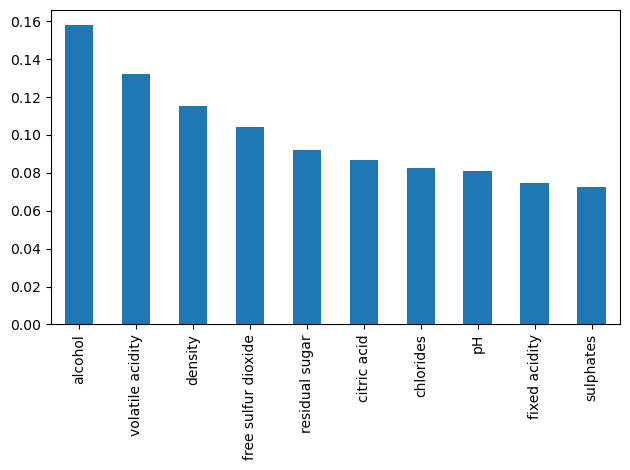

In [94]:
forest_importances = pd.Series(models[1].feature_importances_, index=X_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()

## Appendix
Code for the analysis and training

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')

In [19]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [22]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


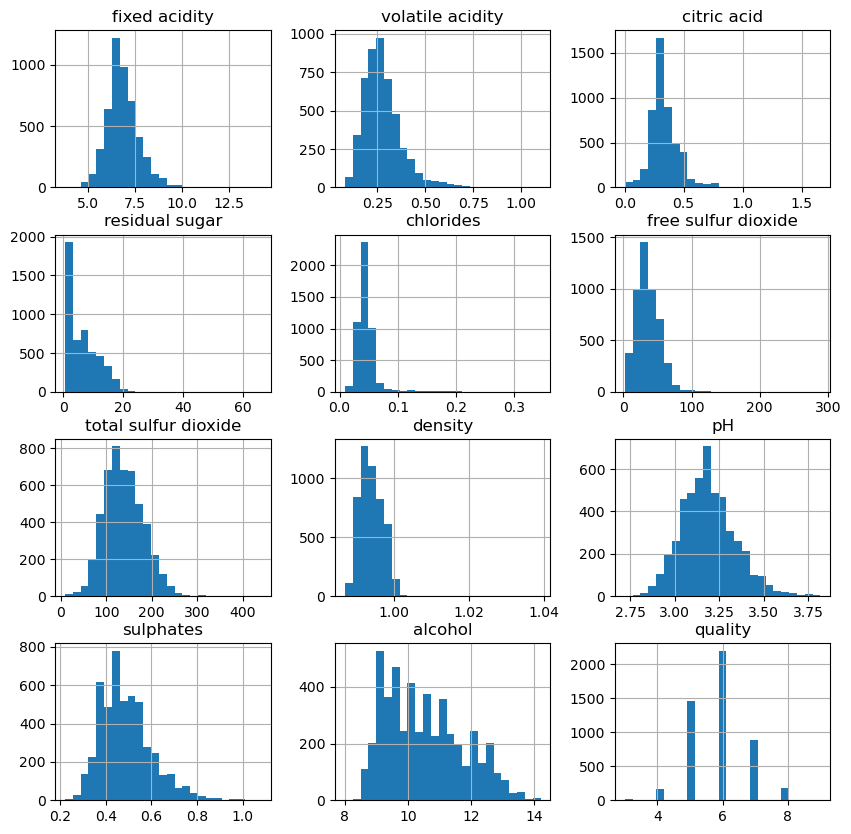

In [57]:
data.hist(bins=25,figsize=(10,10))
plt.show()

<Axes: >

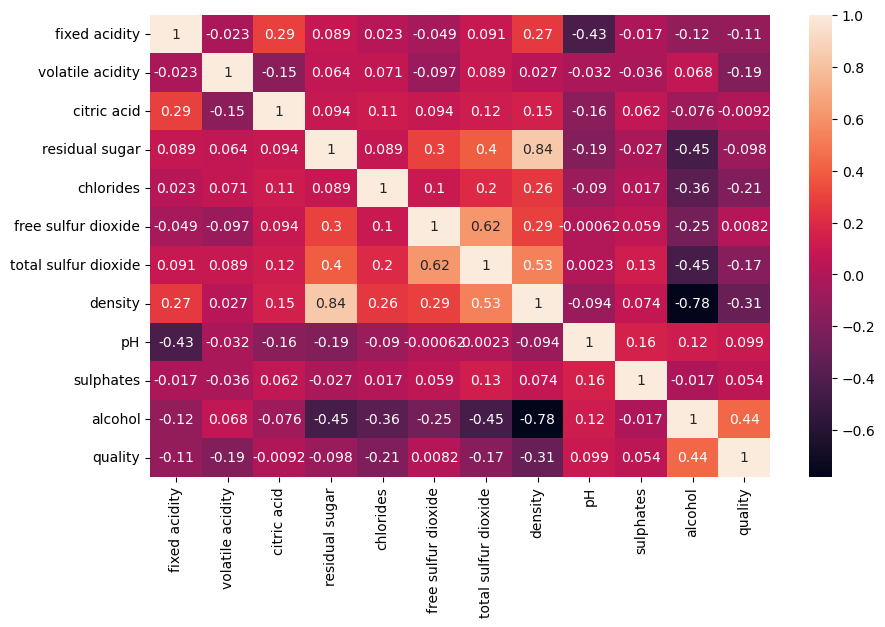

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data.corr(), ax=ax, annot=True)

In [51]:
df = data.drop('total sulfur dioxide',axis=1)

In [52]:
df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [58]:
df['is good wine'] = [1 if x > 5 else 0 for x in df.quality]

X = df.drop(['quality', 'is good wine'], axis=1)
y = df['is good wine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

norm = MinMaxScaler()
norm_fit = norm.fit(X_train)

x_train = norm_fit.transform(X_train)
x_test = norm_fit.transform(X_test)

In [86]:
models = [LogisticRegression(), RandomForestClassifier(n_estimators=20), AdaBoostClassifier()]
models_pred_train = []
models_pred_test = []

for model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    models_pred_train.append(train_pred)
    models_pred_test.append(test_pred)
     
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, train_pred))
    print('Validation Accuracy : ', metrics.roc_auc_score(y_test, test_pred))
    print()

LogisticRegression() : 
Training Accuracy :  0.6791789633908883
Validation Accuracy :  0.6667163029039562

RandomForestClassifier(n_estimators=20) : 
Training Accuracy :  0.998478011458889
Validation Accuracy :  0.8005923257649891

AdaBoostClassifier() : 
Training Accuracy :  0.743157323295453
Validation Accuracy :  0.7168418116753885



In [87]:
for i in range(len(models)):
    print(f'{models[i]}:')
    print(metrics.accuracy_score(y_test, models_pred_test[i]))
    print(metrics.f1_score(y_test, models_pred_test[i]))
    print(metrics.confusion_matrix(y_test, models_pred_test[i]))

LogisticRegression():
0.7397959183673469
0.8195329087048833
[[146 175]
 [ 80 579]]
RandomForestClassifier(n_estimators=20):
0.8295918367346938
0.8747186796699175
[[230  91]
 [ 76 583]]
AdaBoostClassifier():
0.7653061224489796
0.8308823529411765
[[185 136]
 [ 94 565]]


In [79]:
y_pred = models_pred_test[1]
print(f'Precision score: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred)}')

Precision score: 0.8772455089820359
Recall score: 0.8892261001517451


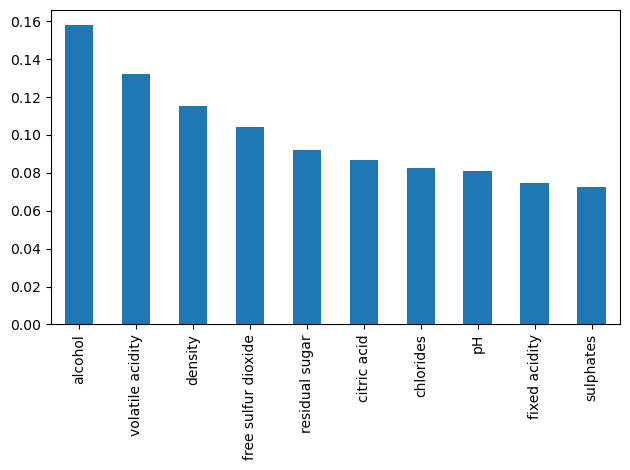

In [88]:
forest_importances = pd.Series(models[1].feature_importances_, index=X_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()